In [7]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2 as cv
import io
import pandas as pd
import os

In [8]:
#CSV directory file name
data_dir = "test_data"


sampling_rate = 1000000
# sample_duration = 0.01
# time = np.linspace(0, sample_duration, int(sampling_rate * sample_duration))
# amplitude = 1

# generate 1000 sine waves
# num_waves = 1000
# frequency = np.random.uniform(0, 100000, num_waves)
# sine_waves = [np.sin(2 * np.pi * f * time) for f in frequency]


In [9]:
def generate_fft_binary(symbol_data, sampling_rate, fig_name):
    #fft = np.fft.fft(input_signal)
    #fft_modulus = np.abs(fft)
    #freqs = np.fft.fftfreq(len(fft_modulus), 1/sampling_rate)

    # plt.figure()
    # plt.plot(freqs[:len(freqs)//2], fft_modulus[:len(freqs)//2], color = "black")
    # plt.xlabel('Frequency (Hz)')
    # plt.ylabel('Magnitude')
    # plt.xlim(0, 100000)

    # make a binary image of the modulus plot
    fig= plt.figure(figsize=(2,2))
    plt.axis('off')
    fig.set_facecolor('black')
    plt.plot(symbol_data, color="white", antialiased=False, linewidth=1)

    plt.close(fig)
    #fig.canvas.draw()
    fig.savefig(f"data/{fig_name}", bbox_inches='tight', pad_inches=0)


# print(f"Frequency: {frequency[1]}")    
# generate_fft_plot(sine_waves[1], sampling_rate)

In [10]:

def plot_raw_data(symbol_data, fig_name):
    plt.figure()
    plt.plot(symbol_data, color="blue")
    plt.xlabel('Frequency index')
    plt.ylabel('Amplitude')
    plt.title('FFT magnitude of LoRa symbol')
    #plt.savefig(f"data/{fig_name}", bbox_inches='tight', pad_inches=0)
    
    

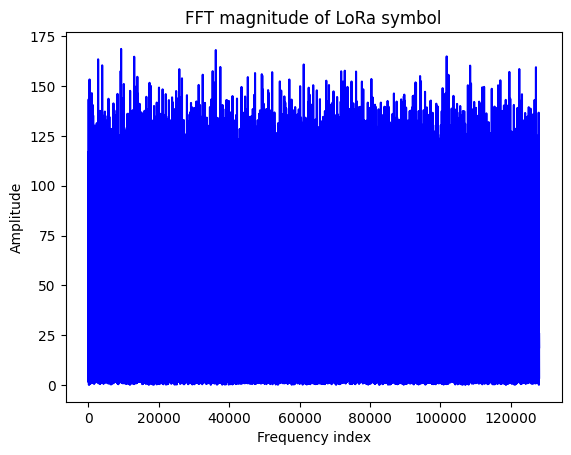

In [11]:
#Cretae data directory if not created
output_dir = "C:\Users\matti\OneDrive\Dokumentuak\ES\LoRa project\data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

#Go througt CSV files
for filename in os.listdir(data_dir):
    if filename.endswith(".csv"):
        #Read the data
        file_path = os.path.join(data_dir, filename)
        symbol_data = pd.read_csv(file_path, header=None, sep=';').values.flatten()

        # Crear el nombre de la imagen de salida basándose en el nombre del archivo CSV
        fig_name = filename.replace(".csv", ".png")

        # Generar y guardar la imagen binaria
        generate_fft_binary(symbol_data, fig_name)

        print(f"Processed: {filename}")

#symbol_file = "snr_-4.0_symbol_0.csv"
#Make sure the data is a unidimentional vector
#symbol_data = pd.read_csv(symbol_file, header=None, sep=';').values.flatten()
#Plot data from csv
#plot_raw_data(symbol_data, "raw_symbol_0.png")
#Generate fft plot
#generate_fft_binary(symbol_data, sampling_rate, "fft_symbol_0.png")

In [12]:
#for i in range(10):
    #generate_fft_plot(sine_waves[i], sampling_rate, f"fft_{i}.png")
    